<a href="https://colab.research.google.com/github/felipednegredo/Genetic-TSP-Solver/blob/main/Algoritmo_G%C3%A9netico%E2%80%8B_Caixeiro_Viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ao rodar o código abaixo, clicar em "Escolher arquivos" e selecionar o arquivo .txt para teste**.

Lembrando que o conteúdo do precisa haver as separações com ponto e vígula e **uma quebra de linha** entre os inputs como na imagem a seguir:

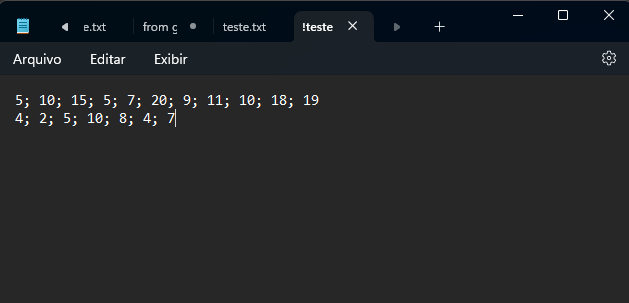

In [ ]:
from google.colab import files
import numpy as np
import random

# Fazer o upload do arquivo
uploaded = files.upload()
# O nome do arquivo será a chave do dicionário `uploaded`
nome_arquivo = list(uploaded.keys())[0]
print(f'Arquivo "{nome_arquivo}" foi carregado.')

Saving Arquivo de Teste.txt to Arquivo de Teste.txt
Arquivo "Arquivo de Teste.txt" foi carregado.


**Função que retorna as a quantidade de cidades e suas respectivas distancias.**

In [ ]:
def retorna_cidades(linha):
  contador = 1
  partes = linha.strip().split(';')
  # print("\nInput:")
  #  print(partes)
  quantidade_cidades = int(partes[0])
  distancia_cidades = np.zeros((quantidade_cidades, quantidade_cidades))
  np.fill_diagonal(distancia_cidades, 1)
  for i in range(quantidade_cidades):
    for j in range(quantidade_cidades):
      if distancia_cidades[i][j] == 0:
        distancia_cidades[i][j] = int(partes[contador])
        distancia_cidades[j][i] = int(partes[contador])
        contador+=1
  np.fill_diagonal(distancia_cidades, 0)

  print("\n=======================================================================================")
  print("\nDistâncias das cidades:")
  print(distancia_cidades)
  print("\n=======================================================================================")
  return quantidade_cidades, distancia_cidades


**Função para criar a população que será utilizada durante todo o processo genético.**

In [ ]:
def criar_populacao(quantidade_cidades,tamanho_populacao):
# Criando os indivíduos/Cromossomos
  populacao = []

  if log:
    print("\nPOPULAÇÃO DE TAMANHO", tamanho_populacao)
  for i in range(tamanho_populacao):
    individuo = np.full(quantidade_cidades, -1)

    contador = 0
    while contador < quantidade_cidades:
      posicao = random.randint(0, quantidade_cidades-1)
      if individuo[posicao] == -1:
        individuo[posicao] = contador
        contador+=1

    if log:
      print("\nIndivíduo "+ str(i))
      print(individuo)
    populacao.append(individuo)
  if log:
    print("\n=======================================================================================")
  return populacao

###**Função para calcular o fitness de cada indivíduo da população.**

In [ ]:
def calcular_fitness(populacao,distancia_cidades,quantidade_cidades):

  populacao_fitness = []
  if log:
    print("\nFITNESS DA POPULAÇÃO:")
  for m in range(len(populacao)):
    fitness = 0
    #print("\nIndivíduo "+ str(m))
    for j in range((quantidade_cidades)-1):
      fitness += distancia_cidades[populacao[m][j]][populacao[m][j+1]]

    fitness += distancia_cidades[populacao[m][0]][populacao[m][quantidade_cidades-1]]
    populacao_fitness.append(fitness)
  if log:
    print(populacao_fitness)
  if log:
    print("\n=======================================================================================")
  return populacao_fitness

**Função da roleta para a escolha de 4 indivíduos apartir de suas respectivas porcentagens.**

In [ ]:
import matplotlib.pyplot as plt

def escolha_pais(populacao,populacao_fitness):

    #Calcular os inversos dos valores
    inversos = [1/v for v in populacao_fitness]

    # Normalizar os valores inversos para que somem exatamente 100
    soma_inversos = sum(inversos)
    valores_normalizados = [round(v / soma_inversos * 100,0) for v in inversos]
    if (sum(valores_normalizados)>100):
      menor_valor = min(valores_normalizados)
      valores_normalizados[valores_normalizados.index(menor_valor)] = valores_normalizados[valores_normalizados.index(menor_valor)] - (sum(valores_normalizados) - 100)
    if (sum(valores_normalizados)<100):
      maior_valor = max(valores_normalizados)
      valores_normalizados[valores_normalizados.index(maior_valor)] = valores_normalizados[valores_normalizados.index(maior_valor)] + (100 - (sum(valores_normalizados)))



    # Criar o gráfico de pizza
    if log:
      labels = [f'Indivíduo {i}' for i in range(len(populacao_fitness))]
      plt.pie(valores_normalizados, labels=labels, autopct='%1.1f%%', startangle=140)
      plt.axis('equal')
      plt.title('Gráfico da população')
      plt.show()

    if log:
        print("\nPAIS ESCOLHIDOS:")

    qtd_agulhas = 4
    agulha = random.randint(1, 100)
    pais = []
    for i in range(qtd_agulhas):
      somador = 0
      for j in range(len(valores_normalizados)):
          somador += valores_normalizados[j]

          if somador >= agulha:
              if log:
                print("\nPai",len(pais),"-> Individuo ",j,":", populacao[j])
              pais.append(populacao[j])

              break
      agulha+=25
      if agulha>100:
        agulha = agulha - 100



    if log:
          print("\n=======================================================================================")
    return pais

**Função de reprodução dos indivíduos.**

In [ ]:
def reproducao(populacao,pais,quantidade_cidades):
  taxa_reproducao = 95

  if random.randint(1, 100) <= taxa_reproducao:
    qtd_filho = 4
    filho = []
    for i in range(qtd_filho):
      filho.append(np.full(quantidade_cidades, -1))

    if quantidade_cidades%2 == 0:
      delimitador = int(quantidade_cidades/2)-1
    else:
      delimitador = int(quantidade_cidades/2)
    for i in range(delimitador):
      filho[0][i] = pais[0][i]
      filho[1][i+delimitador] = pais[0][i]
      filho[2][i] = pais[2][i]
      filho[3][i+delimitador] = pais[2][i]

    for m in range(len(filho)):

      if m < 2:
        pai= 1
      else:
        pai = 3

      for i in range(quantidade_cidades):
          if pais[pai][i] not in filho[m]:
              for j in range(quantidade_cidades):
                  if filho[m][j] == -1:
                      filho[m][j] = pais[pai][i]
                      break


    for i in range(len(filho)):
      if log:
          print("\nFilho",i,"->", filho[i])
      populacao.append(filho[i])
  else:
    if log:
          print("\nNão houve reprodução")
  if log:
      print("\n=======================================================================================")
  return populacao

**Função de mutação, onde ocorre o swap de valores dentro do indivíduo.**

In [ ]:
def mutacao(populacao):
  taxa_mutacao = 5
  if random.randint(1, 100) <= taxa_mutacao:
    individuo_mutado = random.randint(0, len(populacao)-1)
    if log:
          print("\nIndividuo",individuo_mutado, "mutado ANTES -> ",populacao[individuo_mutado])
    pos_1 = random.randint(0, len(populacao[individuo_mutado])-1)
    pos_2 = pos_1
    while pos_1 == pos_2:
      pos_2 = random.randint(0, len(populacao[individuo_mutado])-1)
    temp = populacao[individuo_mutado][pos_1]
    populacao[individuo_mutado][pos_1] =  populacao[individuo_mutado][pos_2]
    populacao[individuo_mutado][pos_2] = temp

    if log:
          print("\nIndividuo",individuo_mutado, "mutado DEPOIS -> ",populacao[individuo_mutado])
  else:
    if log:
          print("\nNão houve mutação")

  if log:
          print("\n=======================================================================================")

  return populacao

**Função feita para eliminar os indivíduos não selecionados pela roleta.**

In [ ]:
def meteoro(populacao,populacao_fitness,tamanho_populacao):

  if len(populacao) > tamanho_populacao:
    indice = -1
    min_valor = max(populacao_fitness)+1
    for i in range(len(populacao)):
      if min_valor > populacao_fitness[i]:
          indice = i
          min_valor = populacao_fitness[i]
    if indice > -1:
      if log:
          print("\nIndividuo",populacao[indice],  "de fitness",populacao_fitness[indice], " SALVO")
      individuo_salvo = populacao.pop(indice)
      individuo__fitness_salvo = populacao_fitness.pop(indice)

    while len(populacao) > tamanho_populacao-1:

      indice =  random.randint(0, len(populacao)-1)

      if log:
          print("\nIndividuo",populacao[indice], "de fitness",populacao_fitness[indice], "esmagado")

      populacao.pop(indice)
      populacao_fitness.pop(indice)

    populacao.append(individuo_salvo)
    populacao_fitness.append(individuo__fitness_salvo)
  else:
    if log:
          print("\nNão houve meteoro :c")
  if log:
          print("\n=======================================================================================")
  return populacao,populacao_fitness


**O bloco abaixo mostra a geração dos individuos, mutações, fitness e resultados finais.**



Distâncias das cidades:
[[ 0. 10. 15.  5.  7.]
 [10.  0. 20.  9. 11.]
 [15. 20.  0. 10. 18.]
 [ 5.  9. 10.  0. 19.]
 [ 7. 11. 18. 19.  0.]]


POPULAÇÃO DE TAMANHO 8

Indivíduo 0
[2 1 3 0 4]

Indivíduo 1
[0 4 1 2 3]

Indivíduo 2
[3 0 2 1 4]

Indivíduo 3
[0 1 2 3 4]

Indivíduo 4
[3 1 2 4 0]

Indivíduo 5
[0 1 2 4 3]

Indivíduo 6
[1 0 2 4 3]

Indivíduo 7
[3 1 2 4 0]


FITNESS DA POPULAÇÃO:
[59.0, 53.0, 70.0, 66.0, 59.0, 72.0, 71.0, 59.0]



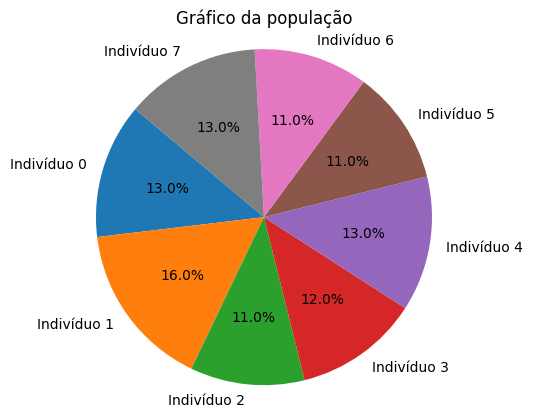


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  3 : [0 1 2 3 4]

Pai 1 -> Individuo  5 : [0 1 2 4 3]

Pai 2 -> Individuo  7 : [3 1 2 4 0]

Pai 3 -> Individuo  1 : [0 4 1 2 3]


Filho 0 -> [0 1 2 4 3]

Filho 1 -> [2 4 0 1 3]

Filho 2 -> [3 1 0 4 2]

Filho 3 -> [0 4 3 1 2]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 53.0, 70.0, 66.0, 59.0, 72.0, 71.0, 59.0, 72.0, 54.0, 54.0, 70.0]


Individuo [0 4 1 2 3] de fitness 53.0  SALVO

Individuo [3 1 0 4 2] de fitness 54.0 esmagado

Individuo [2 4 0 1 3] de fitness 54.0 esmagado

Individuo [1 0 2 4 3] de fitness 71.0 esmagado

Individuo [3 1 2 4 0] de fitness 59.0 esmagado


Últimos Resultados: [53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



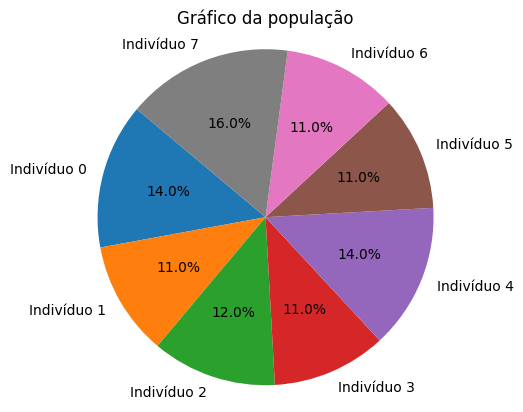


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [0 4 3 1 2]

Pai 1 -> Individuo  0 : [2 1 3 0 4]

Pai 2 -> Individuo  2 : [0 1 2 3 4]

Pai 3 -> Individuo  4 : [3 1 2 4 0]


Filho 0 -> [0 4 2 1 3]

Filho 1 -> [2 1 0 4 3]

Filho 2 -> [0 1 3 2 4]

Filho 3 -> [3 2 0 1 4]


Individuo 11 mutado ANTES ->  [3 2 0 1 4]

Individuo 11 mutado DEPOIS ->  [3 1 0 2 4]


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 66.0, 72.0, 59.0, 72.0, 70.0, 53.0, 59.0, 66.0, 54.0, 71.0]


Individuo [0 4 1 2 3] de fitness 53.0  SALVO

Individuo [0 4 2 1 3] de fitness 59.0 esmagado

Individuo [3 1 0 2 4] de fitness 71.0 esmagado

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [0 1 2 4 3] de fitness 72.0 esmagado


Últimos Resultados: [53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



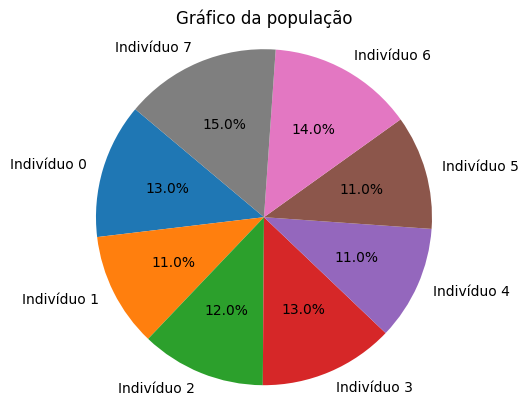


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [0 1 2 3 4]

Pai 1 -> Individuo  4 : [0 1 2 4 3]

Pai 2 -> Individuo  6 : [0 1 3 2 4]

Pai 3 -> Individuo  0 : [2 1 3 0 4]


Filho 0 -> [0 1 2 4 3]

Filho 1 -> [2 4 0 1 3]

Filho 2 -> [0 1 2 3 4]

Filho 3 -> [2 3 0 1 4]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 66.0, 59.0, 72.0, 70.0, 54.0, 53.0, 72.0, 54.0, 66.0, 54.0]


Individuo [0 4 1 2 3] de fitness 53.0  SALVO

Individuo [0 1 2 4 3] de fitness 72.0 esmagado

Individuo [3 1 2 4 0] de fitness 59.0 esmagado

Individuo [3 0 2 1 4] de fitness 70.0 esmagado

Individuo [0 1 2 4 3] de fitness 72.0 esmagado


Últimos Resultados: [53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



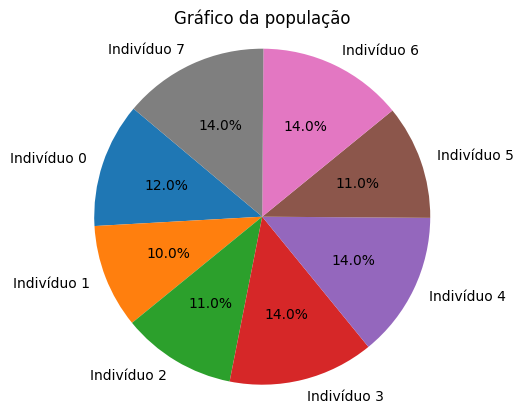


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  3 : [0 1 3 2 4]

Pai 1 -> Individuo  5 : [0 1 2 3 4]

Pai 2 -> Individuo  7 : [0 4 1 2 3]

Pai 3 -> Individuo  1 : [0 1 2 3 4]


Filho 0 -> [0 1 2 3 4]

Filho 1 -> [2 3 0 1 4]

Filho 2 -> [0 4 1 2 3]

Filho 3 -> [1 2 0 4 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 66.0, 70.0, 54.0, 54.0, 66.0, 54.0, 53.0, 66.0, 54.0, 53.0, 70.0]


Individuo [0 4 1 2 3] de fitness 53.0  SALVO

Individuo [0 4 1 2 3] de fitness 53.0 esmagado

Individuo [0 1 2 3 4] de fitness 66.0 esmagado

Individuo [2 3 0 1 4] de fitness 54.0 esmagado

Individuo [0 1 2 3 4] de fitness 66.0 esmagado


Últimos Resultados: [53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



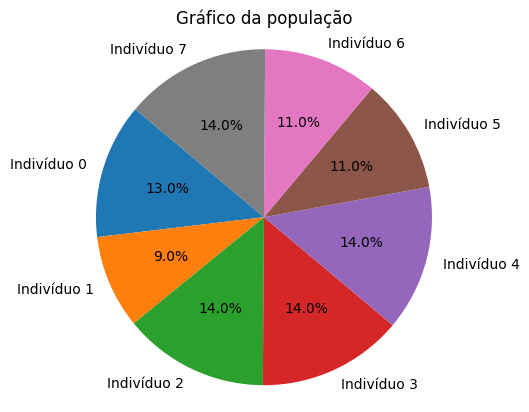


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 3 0 1 4]

Pai 1 -> Individuo  7 : [0 4 1 2 3]

Pai 2 -> Individuo  1 : [0 4 3 1 2]

Pai 3 -> Individuo  3 : [2 4 0 1 3]


Filho 0 -> [2 3 0 4 1]

Filho 1 -> [0 4 2 3 1]

Filho 2 -> [0 4 2 1 3]

Filho 3 -> [2 1 0 4 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 54.0, 54.0, 54.0, 66.0, 70.0, 53.0, 53.0, 54.0, 59.0, 66.0]


Individuo [0 4 1 2 3] de fitness 53.0  SALVO

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [2 3 0 1 4] de fitness 54.0 esmagado

Individuo [0 1 2 3 4] de fitness 66.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



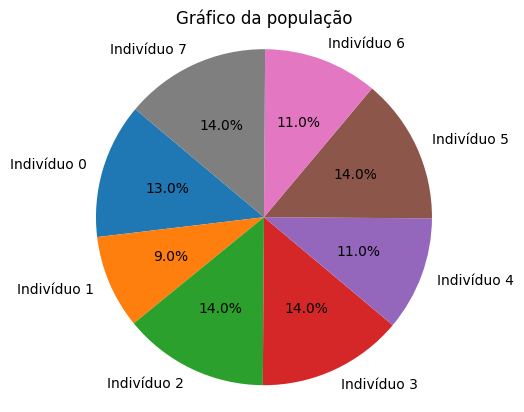


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  5 : [2 3 0 4 1]

Pai 1 -> Individuo  7 : [0 4 1 2 3]

Pai 2 -> Individuo  1 : [0 4 3 1 2]

Pai 3 -> Individuo  3 : [2 4 0 1 3]


Filho 0 -> [2 3 0 4 1]

Filho 1 -> [0 4 2 3 1]

Filho 2 -> [0 4 2 1 3]

Filho 3 -> [2 1 0 4 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 54.0, 54.0, 70.0, 53.0, 66.0, 53.0, 53.0, 54.0, 59.0, 66.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [2 4 0 1 3] de fitness 54.0 esmagado

Individuo [0 4 1 2 3] de fitness 53.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



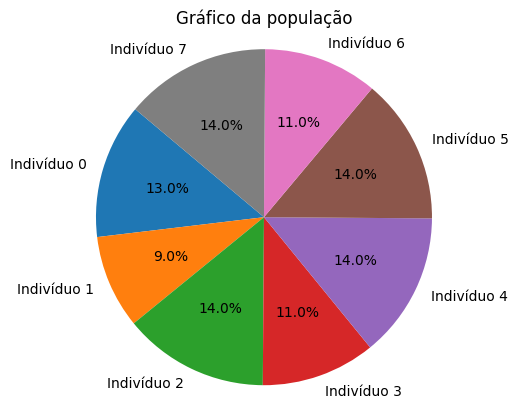


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [0 4 3 1 2]

Pai 1 -> Individuo  3 : [1 2 0 4 3]

Pai 2 -> Individuo  5 : [0 4 2 3 1]

Pai 3 -> Individuo  7 : [2 3 0 4 1]


Filho 0 -> [0 4 1 2 3]

Filho 1 -> [1 2 0 4 3]

Filho 2 -> [0 4 2 3 1]

Filho 3 -> [2 3 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 54.0, 70.0, 53.0, 54.0, 66.0, 53.0, 53.0, 70.0, 54.0, 53.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [1 2 0 4 3] de fitness 70.0 esmagado

Individuo [0 4 3 1 2] de fitness 70.0 esmagado

Individuo [0 4 1 2 3] de fitness 53.0 esmagado

Individuo [1 2 0 4 3] de fitness 70.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



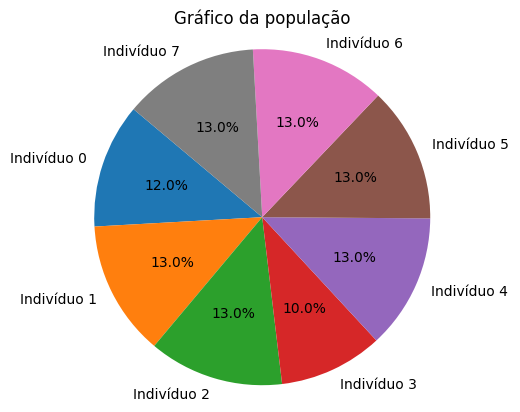


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [2 1 3 0 4]

Pai 1 -> Individuo  2 : [0 4 2 3 1]

Pai 2 -> Individuo  4 : [2 3 0 4 1]

Pai 3 -> Individuo  6 : [2 3 0 4 1]


Filho 0 -> [2 1 0 4 3]

Filho 1 -> [0 4 2 1 3]

Filho 2 -> [2 3 0 4 1]

Filho 3 -> [0 4 2 3 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 54.0, 54.0, 66.0, 53.0, 54.0, 53.0, 53.0, 66.0, 59.0, 53.0, 54.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



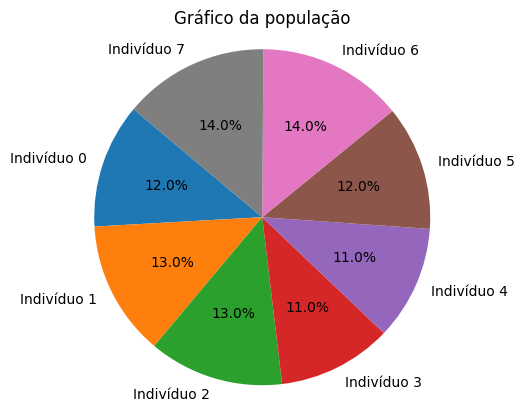


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [2 1 3 0 4]

Pai 1 -> Individuo  2 : [0 4 2 3 1]

Pai 2 -> Individuo  4 : [2 1 0 4 3]

Pai 3 -> Individuo  6 : [2 3 0 4 1]


Filho 0 -> [2 1 0 4 3]

Filho 1 -> [0 4 2 1 3]

Filho 2 -> [2 1 3 0 4]

Filho 3 -> [3 0 2 1 4]


Individuo 10 mutado ANTES ->  [2 1 3 0 4]

Individuo 10 mutado DEPOIS ->  [2 3 1 0 4]


FITNESS DA POPULAÇÃO:
[59.0, 54.0, 54.0, 66.0, 66.0, 59.0, 53.0, 53.0, 66.0, 59.0, 54.0, 70.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [0 1 3 2 4] de fitness 54.0 esmagado

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [2 1 0 4 3] de fitness 66.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



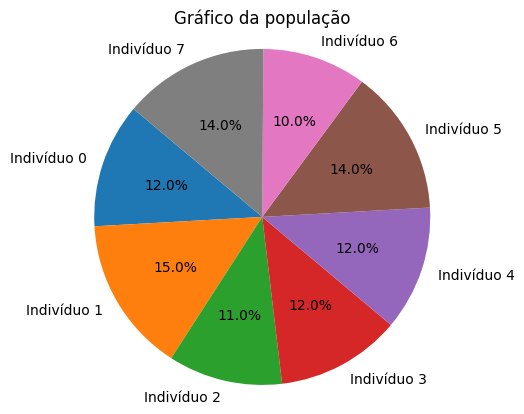


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  5 : [2 3 1 0 4]

Pai 1 -> Individuo  7 : [2 3 0 4 1]

Pai 2 -> Individuo  1 : [0 4 2 3 1]

Pai 3 -> Individuo  3 : [0 4 2 1 3]


Filho 0 -> [2 3 0 4 1]

Filho 1 -> [0 4 2 3 1]

Filho 2 -> [0 4 2 1 3]

Filho 3 -> [2 1 0 4 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 54.0, 66.0, 59.0, 59.0, 54.0, 70.0, 53.0, 53.0, 54.0, 59.0, 66.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [2 3 1 0 4] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



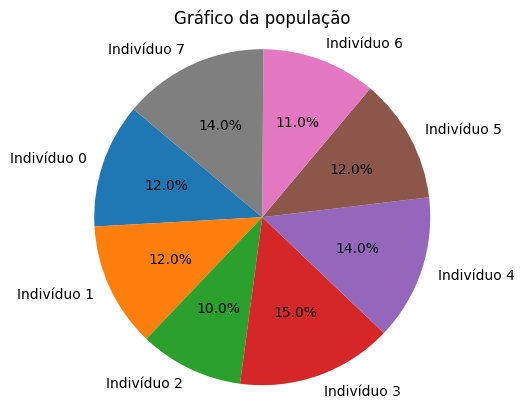


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [0 4 2 1 3]

Pai 1 -> Individuo  3 : [2 3 0 4 1]

Pai 2 -> Individuo  5 : [0 4 2 1 3]

Pai 3 -> Individuo  7 : [2 3 0 4 1]


Filho 0 -> [0 4 2 3 1]

Filho 1 -> [2 3 0 4 1]

Filho 2 -> [0 4 2 3 1]

Filho 3 -> [2 3 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 59.0, 70.0, 53.0, 54.0, 59.0, 66.0, 53.0, 54.0, 53.0, 54.0, 53.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [2 1 3 0 4] de fitness 59.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



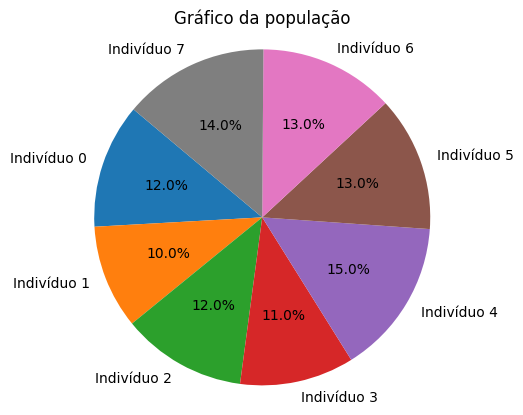


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 3 0 4 1]

Pai 1 -> Individuo  6 : [0 4 2 3 1]

Pai 2 -> Individuo  0 : [0 4 2 1 3]

Pai 3 -> Individuo  2 : [0 4 2 1 3]


Filho 0 -> [2 3 0 4 1]

Filho 1 -> [0 4 2 3 1]

Filho 2 -> [0 4 2 1 3]

Filho 3 -> [2 1 0 4 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 70.0, 59.0, 66.0, 53.0, 54.0, 54.0, 53.0, 53.0, 54.0, 59.0, 66.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [0 4 2 1 3] de fitness 59.0 esmagado

Individuo [3 0 2 1 4] de fitness 70.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.  0.
  0.  0.]



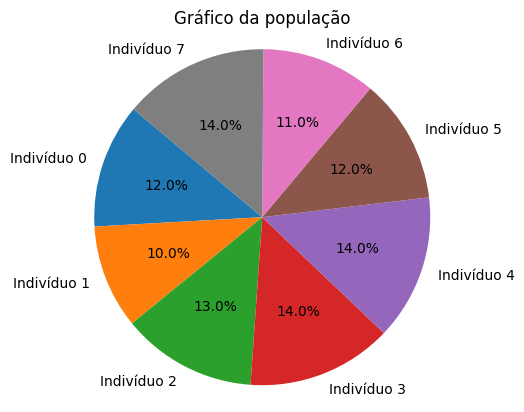


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  5 : [0 4 2 1 3]

Pai 1 -> Individuo  7 : [2 3 0 4 1]

Pai 2 -> Individuo  1 : [2 1 0 4 3]

Pai 3 -> Individuo  3 : [2 3 0 4 1]


Filho 0 -> [0 4 2 3 1]

Filho 1 -> [2 3 0 4 1]

Filho 2 -> [2 1 3 0 4]

Filho 3 -> [3 0 2 1 4]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 66.0, 54.0, 53.0, 53.0, 59.0, 66.0, 53.0, 54.0, 53.0, 59.0, 70.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 1 3 0 4] de fitness 59.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.  0.
  0.  0.]



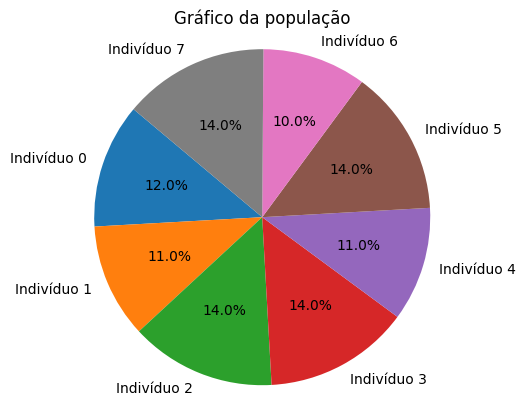


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [0 4 2 3 1]

Pai 1 -> Individuo  4 : [2 1 0 4 3]

Pai 2 -> Individuo  6 : [3 0 2 1 4]

Pai 3 -> Individuo  0 : [0 4 2 1 3]


Filho 0 -> [0 4 2 1 3]

Filho 1 -> [2 1 0 4 3]

Filho 2 -> [3 0 4 2 1]

Filho 3 -> [4 2 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 66.0, 54.0, 53.0, 66.0, 53.0, 70.0, 53.0, 59.0, 66.0, 59.0, 54.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [2 1 0 4 3] de fitness 66.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.  0.
  0.  0.]



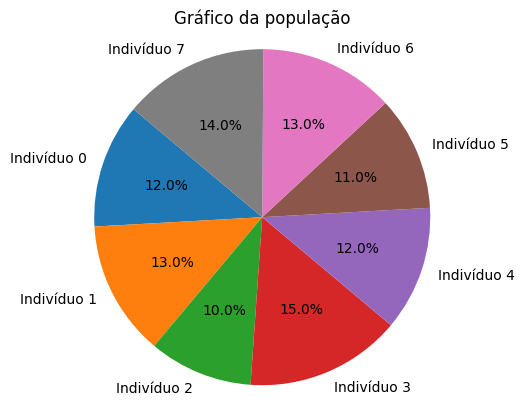


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [4 2 3 0 1]

Pai 1 -> Individuo  7 : [2 3 0 4 1]

Pai 2 -> Individuo  1 : [0 4 2 3 1]

Pai 3 -> Individuo  3 : [2 3 0 4 1]


Filho 0 -> [4 2 3 0 1]

Filho 1 -> [3 0 4 2 1]

Filho 2 -> [0 4 2 3 1]

Filho 3 -> [2 3 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 54.0, 70.0, 53.0, 59.0, 66.0, 54.0, 53.0, 54.0, 59.0, 54.0, 53.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [0 4 2 1 3] de fitness 59.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.  0.
  0.  0.]



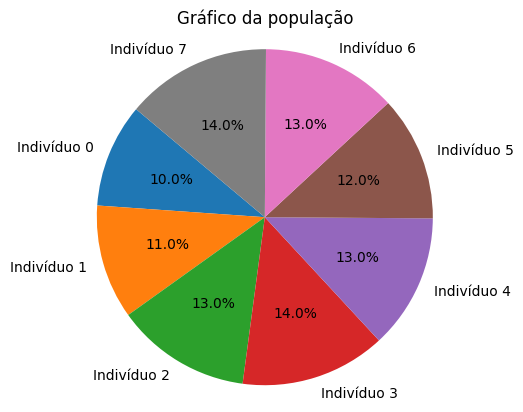


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [4 2 3 0 1]

Pai 1 -> Individuo  4 : [4 2 3 0 1]

Pai 2 -> Individuo  6 : [0 4 2 3 1]

Pai 3 -> Individuo  7 : [2 3 0 4 1]


Filho 0 -> [4 2 3 0 1]

Filho 1 -> [3 0 4 2 1]

Filho 2 -> [0 4 2 3 1]

Filho 3 -> [2 3 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[70.0, 66.0, 54.0, 53.0, 54.0, 59.0, 54.0, 53.0, 54.0, 59.0, 54.0, 53.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.  0.
  0.  0.]



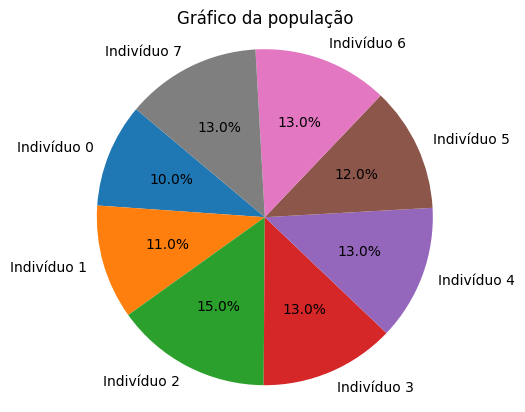


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  5 : [3 0 4 2 1]

Pai 1 -> Individuo  7 : [2 3 0 4 1]

Pai 2 -> Individuo  1 : [2 1 0 4 3]

Pai 3 -> Individuo  3 : [4 2 3 0 1]


Filho 0 -> [3 0 2 4 1]

Filho 1 -> [2 4 3 0 1]

Filho 2 -> [2 1 4 3 0]

Filho 3 -> [4 3 2 1 0]


Não houve mutação


FITNESS DA POPULAÇÃO:
[70.0, 66.0, 54.0, 54.0, 53.0, 59.0, 53.0, 53.0, 58.0, 72.0, 70.0, 66.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [2 1 4 3 0] de fitness 70.0 esmagado

Individuo [3 0 2 1 4] de fitness 70.0 esmagado

Individuo [2 1 0 4 3] de fitness 66.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.  0.
  0.  0.]



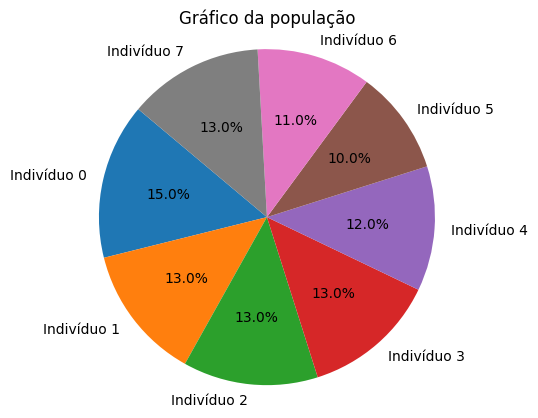


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [4 2 3 0 1]

Pai 1 -> Individuo  2 : [2 3 0 4 1]

Pai 2 -> Individuo  4 : [3 0 2 4 1]

Pai 3 -> Individuo  6 : [4 3 2 1 0]


Filho 0 -> [4 2 3 0 1]

Filho 1 -> [3 0 4 2 1]

Filho 2 -> [3 0 4 2 1]

Filho 3 -> [4 2 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 54.0, 53.0, 53.0, 58.0, 72.0, 66.0, 53.0, 54.0, 59.0, 59.0, 54.0]


Individuo [2 3 0 4 1] de fitness 53.0  SALVO

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [4 3 2 1 0] de fitness 66.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
  0.  0.]



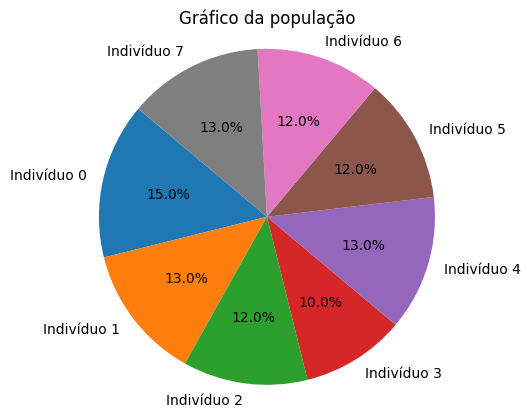


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [3 0 4 2 1]

Pai 1 -> Individuo  0 : [4 2 3 0 1]

Pai 2 -> Individuo  1 : [2 3 0 4 1]

Pai 3 -> Individuo  4 : [2 3 0 4 1]


Filho 0 -> [3 0 4 2 1]

Filho 1 -> [4 2 3 0 1]

Filho 2 -> [2 3 0 4 1]

Filho 3 -> [0 4 2 3 1]


Individuo 7 mutado ANTES ->  [2 3 0 4 1]

Individuo 7 mutado DEPOIS ->  [3 2 0 4 1]


FITNESS DA POPULAÇÃO:
[54.0, 53.0, 58.0, 72.0, 53.0, 59.0, 59.0, 52.0, 59.0, 54.0, 53.0, 54.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52.  0.]



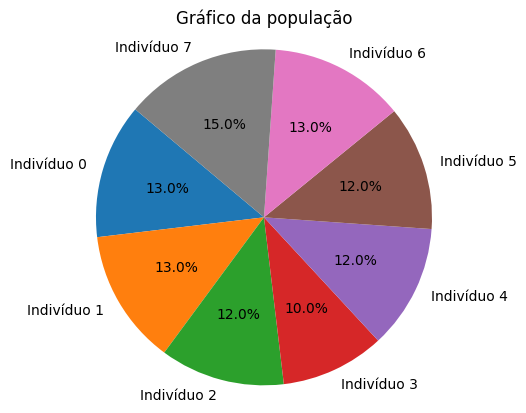


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [3 0 4 2 1]

Pai 1 -> Individuo  6 : [2 3 0 4 1]

Pai 2 -> Individuo  0 : [4 2 3 0 1]

Pai 3 -> Individuo  2 : [3 0 2 4 1]


Filho 0 -> [3 0 2 4 1]

Filho 1 -> [2 4 3 0 1]

Filho 2 -> [4 2 3 0 1]

Filho 3 -> [3 0 4 2 1]


Individuo 2 mutado ANTES ->  [3 0 2 4 1]

Individuo 2 mutado DEPOIS ->  [3 1 2 4 0]


FITNESS DA POPULAÇÃO:
[54.0, 53.0, 59.0, 72.0, 59.0, 59.0, 53.0, 52.0, 58.0, 72.0, 54.0, 59.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [4 2 3 0 1] de fitness 54.0 esmagado


Últimos Resultados: [53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



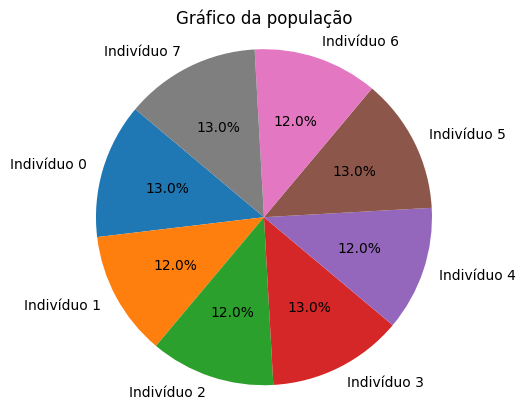


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [2 3 0 4 1]

Pai 1 -> Individuo  2 : [3 0 4 2 1]

Pai 2 -> Individuo  4 : [3 0 2 4 1]

Pai 3 -> Individuo  6 : [3 0 4 2 1]


Filho 0 -> [2 3 0 4 1]

Filho 1 -> [0 4 2 3 1]

Filho 2 -> [3 0 4 2 1]

Filho 3 -> [4 2 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[53.0, 59.0, 59.0, 53.0, 58.0, 54.0, 59.0, 52.0, 53.0, 54.0, 59.0, 54.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [3 1 2 4 0] de fitness 59.0 esmagado

Individuo [4 2 3 0 1] de fitness 54.0 esmagado


Últimos Resultados: [52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



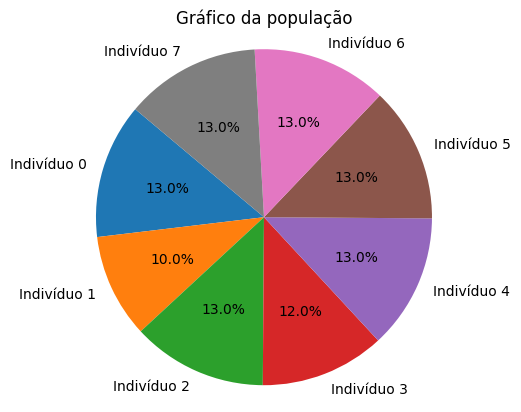


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [2 3 0 4 1]

Pai 1 -> Individuo  4 : [4 2 3 0 1]

Pai 2 -> Individuo  6 : [0 4 2 3 1]

Pai 3 -> Individuo  0 : [2 3 0 4 1]


Filho 0 -> [2 3 4 0 1]

Filho 1 -> [4 0 2 3 1]

Filho 2 -> [0 4 2 3 1]

Filho 3 -> [2 3 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[53.0, 59.0, 53.0, 58.0, 54.0, 53.0, 54.0, 52.0, 66.0, 52.0, 54.0, 53.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [4 0 2 3 1] de fitness 52.0 esmagado

Individuo [4 2 3 0 1] de fitness 54.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



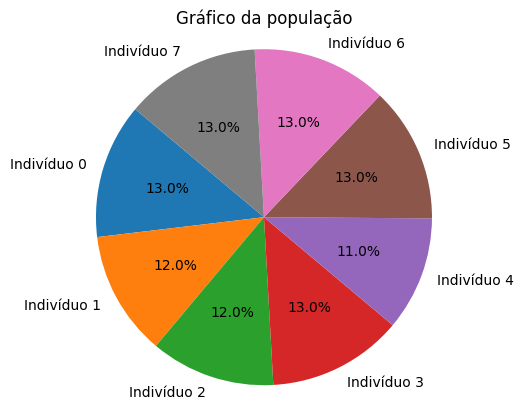


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [3 0 4 2 1]

Pai 1 -> Individuo  3 : [2 3 0 4 1]

Pai 2 -> Individuo  5 : [0 4 2 3 1]

Pai 3 -> Individuo  7 : [3 2 0 4 1]


Filho 0 -> [3 0 2 4 1]

Filho 1 -> [2 4 3 0 1]

Filho 2 -> [0 4 3 2 1]

Filho 3 -> [3 2 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[53.0, 59.0, 58.0, 53.0, 66.0, 54.0, 53.0, 52.0, 58.0, 72.0, 66.0, 52.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado


Últimos Resultados: [52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



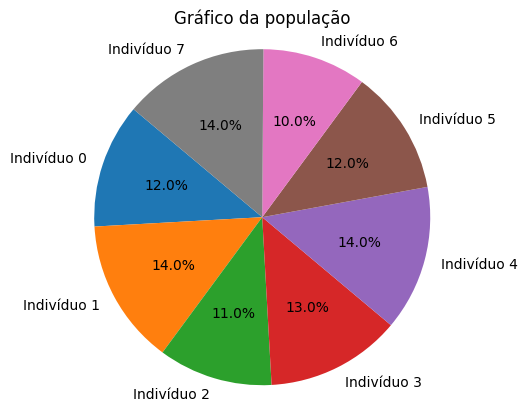


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  7 : [3 2 0 4 1]

Pai 1 -> Individuo  1 : [2 3 0 4 1]

Pai 2 -> Individuo  3 : [0 4 2 3 1]

Pai 3 -> Individuo  5 : [3 0 2 4 1]


Filho 0 -> [3 2 0 4 1]

Filho 1 -> [0 4 3 2 1]

Filho 2 -> [0 4 3 2 1]

Filho 3 -> [3 2 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[59.0, 53.0, 66.0, 54.0, 53.0, 58.0, 72.0, 52.0, 52.0, 66.0, 66.0, 52.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 3 4 0 1] de fitness 66.0 esmagado

Individuo [3 0 4 2 1] de fitness 59.0 esmagado

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [0 4 2 3 1] de fitness 54.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



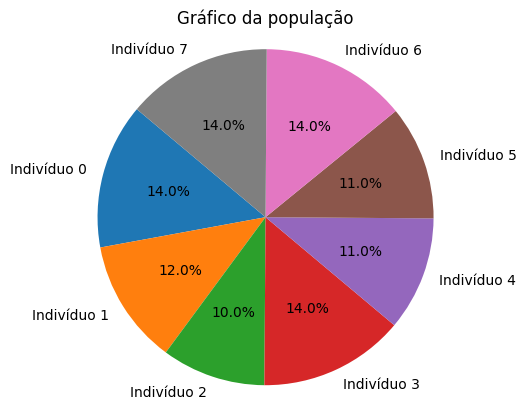


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [3 0 2 4 1]

Pai 1 -> Individuo  3 : [3 2 0 4 1]

Pai 2 -> Individuo  5 : [0 4 3 2 1]

Pai 3 -> Individuo  7 : [3 2 0 4 1]


Filho 0 -> [3 0 2 4 1]

Filho 1 -> [2 4 3 0 1]

Filho 2 -> [0 4 3 2 1]

Filho 3 -> [3 2 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[53.0, 58.0, 72.0, 52.0, 66.0, 66.0, 52.0, 52.0, 58.0, 72.0, 66.0, 52.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 2 0 4 1] de fitness 52.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



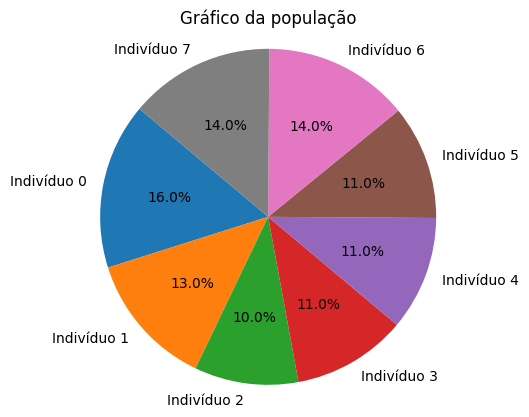


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  7 : [3 2 0 4 1]

Pai 1 -> Individuo  0 : [2 3 0 4 1]

Pai 2 -> Individuo  2 : [2 4 3 0 1]

Pai 3 -> Individuo  5 : [0 4 3 2 1]


Filho 0 -> [3 2 0 4 1]

Filho 1 -> [0 4 3 2 1]

Filho 2 -> [2 4 0 3 1]

Filho 3 -> [0 3 2 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[53.0, 58.0, 72.0, 66.0, 66.0, 66.0, 52.0, 52.0, 52.0, 66.0, 59.0, 54.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 3 0 4 1] de fitness 53.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



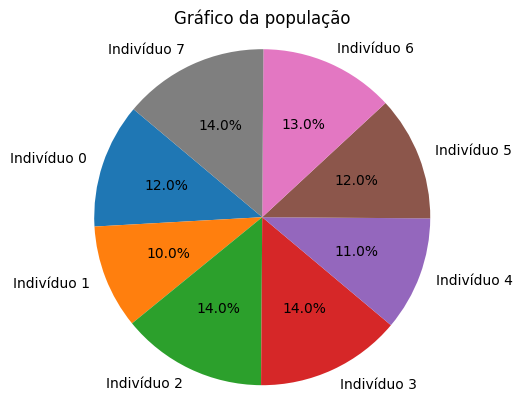


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [0 4 3 2 1]

Pai 1 -> Individuo  3 : [3 2 0 4 1]

Pai 2 -> Individuo  5 : [2 4 0 3 1]

Pai 3 -> Individuo  7 : [3 2 0 4 1]


Filho 0 -> [0 4 3 2 1]

Filho 1 -> [3 2 0 4 1]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Individuo 3 mutado ANTES ->  [3 2 0 4 1]

Individuo 3 mutado DEPOIS ->  [3 1 0 4 2]


FITNESS DA POPULAÇÃO:
[58.0, 66.0, 52.0, 54.0, 66.0, 59.0, 54.0, 52.0, 66.0, 52.0, 72.0, 58.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



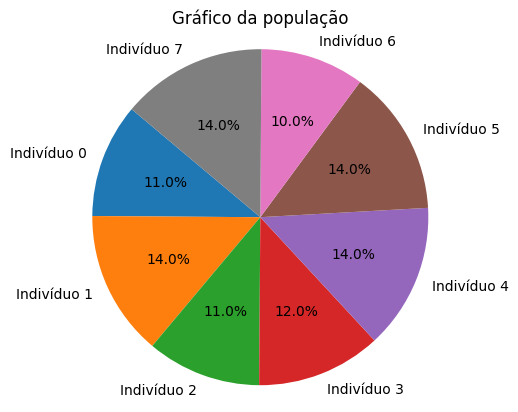


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [2 4 3 0 1]

Pai 1 -> Individuo  0 : [0 4 3 2 1]

Pai 2 -> Individuo  2 : [0 4 3 2 1]

Pai 3 -> Individuo  4 : [0 3 2 4 1]


Filho 0 -> [2 4 0 3 1]

Filho 1 -> [0 3 2 4 1]

Filho 2 -> [0 4 3 2 1]

Filho 3 -> [3 2 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[66.0, 54.0, 66.0, 59.0, 54.0, 52.0, 72.0, 52.0, 59.0, 54.0, 66.0, 52.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [2 4 0 3 1] de fitness 59.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



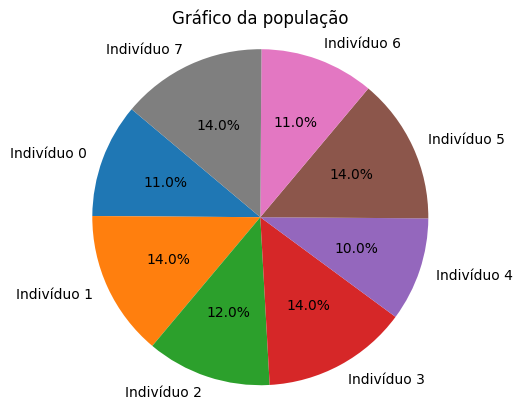


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [2 4 0 3 1]

Pai 1 -> Individuo  4 : [2 4 3 0 1]

Pai 2 -> Individuo  6 : [0 4 3 2 1]

Pai 3 -> Individuo  0 : [0 4 3 2 1]


Filho 0 -> [2 4 3 0 1]

Filho 1 -> [3 0 2 4 1]

Filho 2 -> [0 4 3 2 1]

Filho 3 -> [3 2 0 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[66.0, 54.0, 59.0, 54.0, 72.0, 54.0, 66.0, 52.0, 72.0, 58.0, 66.0, 52.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [0 3 2 4 1] de fitness 54.0 esmagado

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [0 3 2 4 1] de fitness 54.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



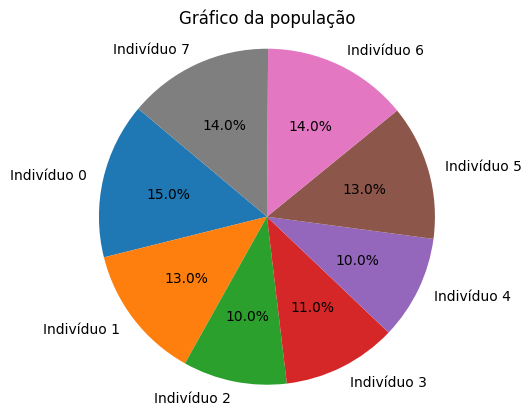


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [3 2 0 4 1]

Pai 1 -> Individuo  0 : [3 1 0 4 2]

Pai 2 -> Individuo  1 : [2 4 0 3 1]

Pai 3 -> Individuo  4 : [2 4 3 0 1]


Filho 0 -> [3 2 1 0 4]

Filho 1 -> [1 0 3 2 4]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 59.0, 72.0, 66.0, 72.0, 58.0, 52.0, 52.0, 66.0, 54.0, 72.0, 58.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [0 4 3 2 1] de fitness 66.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [3 2 1 0 4] de fitness 66.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



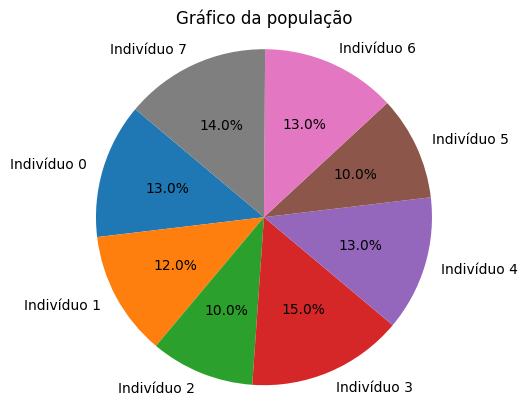


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [2 4 0 3 1]

Pai 1 -> Individuo  3 : [3 2 0 4 1]

Pai 2 -> Individuo  5 : [2 4 3 0 1]

Pai 3 -> Individuo  7 : [3 2 0 4 1]


Filho 0 -> [2 4 3 0 1]

Filho 1 -> [3 0 2 4 1]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 59.0, 72.0, 52.0, 54.0, 72.0, 58.0, 52.0, 72.0, 58.0, 72.0, 58.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53.
 52. 52.]



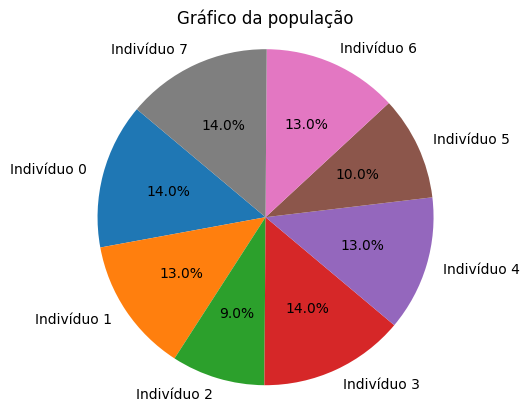


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [3 1 0 4 2]

Pai 1 -> Individuo  1 : [2 4 0 3 1]

Pai 2 -> Individuo  4 : [3 0 2 4 1]

Pai 3 -> Individuo  6 : [3 0 2 4 1]


Filho 0 -> [3 1 2 4 0]

Filho 1 -> [2 4 3 1 0]

Filho 2 -> [3 0 2 4 1]

Filho 3 -> [2 4 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 59.0, 72.0, 54.0, 58.0, 72.0, 58.0, 52.0, 59.0, 71.0, 58.0, 72.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 1 0] de fitness 71.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [1 0 3 2 4] de fitness 54.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53.
 52. 52.]



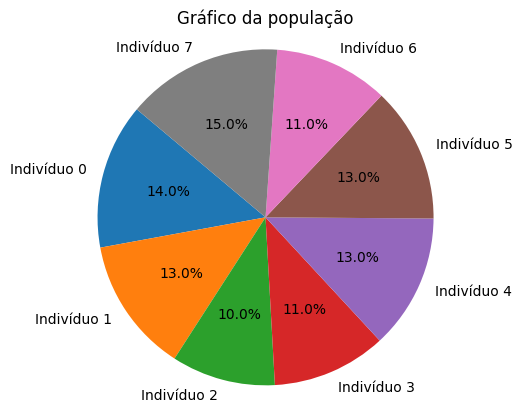


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [3 1 0 4 2]

Pai 1 -> Individuo  2 : [2 4 3 0 1]

Pai 2 -> Individuo  4 : [3 0 2 4 1]

Pai 3 -> Individuo  6 : [2 4 3 0 1]


Filho 0 -> [3 1 2 4 0]

Filho 1 -> [2 4 3 1 0]

Filho 2 -> [3 0 2 4 1]

Filho 3 -> [2 4 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 59.0, 72.0, 72.0, 58.0, 59.0, 72.0, 52.0, 59.0, 71.0, 58.0, 72.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [2 4 3 1 0] de fitness 71.0 esmagado

Individuo [3 1 2 4 0] de fitness 59.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53.
 52. 52.]



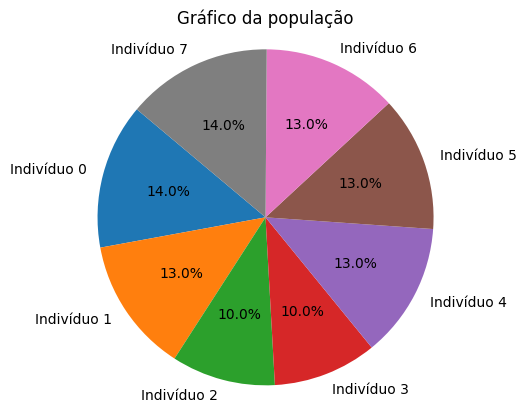


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [3 0 2 4 1]

Pai 1 -> Individuo  0 : [3 1 0 4 2]

Pai 2 -> Individuo  1 : [2 4 0 3 1]

Pai 3 -> Individuo  4 : [3 0 2 4 1]


Filho 0 -> [3 0 1 4 2]

Filho 1 -> [1 4 3 0 2]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[54.0, 59.0, 72.0, 72.0, 58.0, 59.0, 58.0, 52.0, 54.0, 70.0, 72.0, 58.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [2 4 0 3 1] de fitness 59.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53.
 52. 52.]



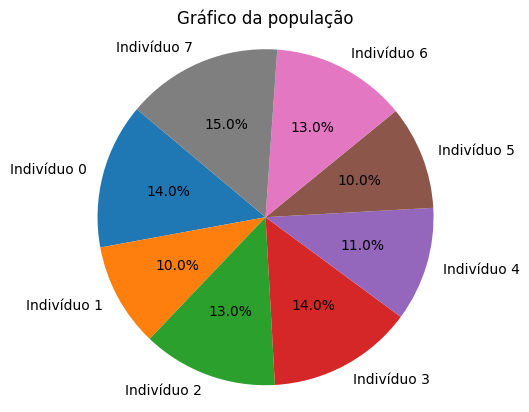


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [3 1 0 4 2]

Pai 1 -> Individuo  3 : [3 0 1 4 2]

Pai 2 -> Individuo  5 : [2 4 3 0 1]

Pai 3 -> Individuo  7 : [3 2 0 4 1]


Filho 0 -> [3 1 0 4 2]

Filho 1 -> [0 4 3 1 2]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Individuo 9 mutado ANTES ->  [0 4 3 1 2]

Individuo 9 mutado DEPOIS ->  [0 4 1 3 2]


FITNESS DA POPULAÇÃO:
[54.0, 72.0, 59.0, 54.0, 70.0, 72.0, 58.0, 52.0, 54.0, 52.0, 72.0, 58.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [1 4 3 0 2] de fitness 70.0 esmagado

Individuo [3 1 0 4 2] de fitness 54.0 esmagado

Individuo [3 0 1 4 2] de fitness 54.0 esmagado

Individuo [3 1 0 4 2] de fitness 54.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53.
 52. 52.]



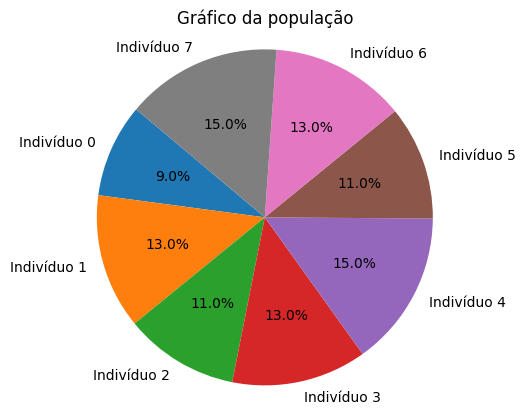


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [0 4 1 3 2]

Pai 1 -> Individuo  6 : [3 0 2 4 1]

Pai 2 -> Individuo  0 : [2 4 3 0 1]

Pai 3 -> Individuo  3 : [3 0 2 4 1]


Filho 0 -> [0 4 3 2 1]

Filho 1 -> [3 2 0 4 1]

Filho 2 -> [2 4 3 0 1]

Filho 3 -> [3 0 2 4 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[72.0, 59.0, 72.0, 58.0, 52.0, 72.0, 58.0, 52.0, 66.0, 52.0, 72.0, 58.0]


Individuo [0 4 1 3 2] de fitness 52.0  SALVO

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [3 2 0 4 1] de fitness 52.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 1 2 4 0] de fitness 59.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53.
 52. 52.]



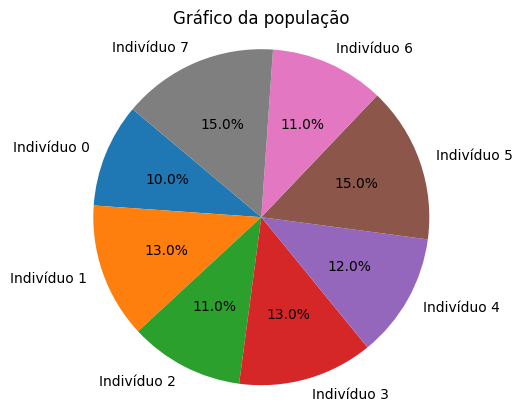


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  7 : [0 4 1 3 2]

Pai 1 -> Individuo  1 : [3 0 2 4 1]

Pai 2 -> Individuo  3 : [3 0 2 4 1]

Pai 3 -> Individuo  5 : [3 2 0 4 1]


Filho 0 -> [0 4 3 2 1]

Filho 1 -> [3 2 0 4 1]

Filho 2 -> [3 0 2 4 1]

Filho 3 -> [2 4 3 0 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[72.0, 58.0, 72.0, 58.0, 66.0, 52.0, 72.0, 52.0, 66.0, 52.0, 58.0, 72.0]


Individuo [3 2 0 4 1] de fitness 52.0  SALVO

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [3 0 2 4 1] de fitness 58.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado

Individuo [2 4 3 0 1] de fitness 72.0 esmagado


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53.
 52. 52.]



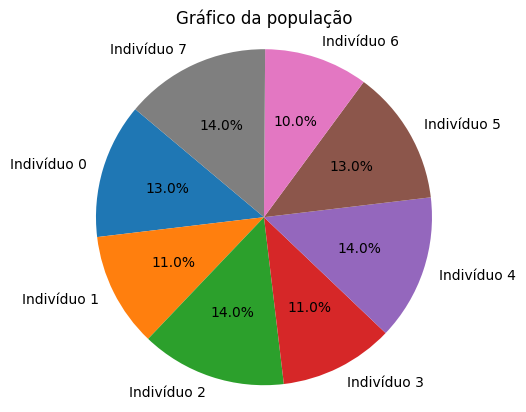


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [3 2 0 4 1]

Pai 1 -> Individuo  6 : [2 4 3 0 1]

Pai 2 -> Individuo  0 : [3 0 2 4 1]

Pai 3 -> Individuo  2 : [0 4 1 3 2]


Não houve reprodução


Não houve mutação


FITNESS DA POPULAÇÃO:
[58.0, 66.0, 52.0, 66.0, 52.0, 58.0, 72.0, 52.0]


Não houve meteoro :c


Últimos Resultados: [52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 52.
 52. 52.]



Melhor Rota: [0 4 1 3 2]

Menor Custo: 52.0




Distâncias das cidades:
[[ 0.  2.  5. 10.]
 [ 2.  0.  8.  4.]
 [ 5.  8.  0.  7.]
 [10.  4.  7.  0.]]


POPULAÇÃO DE TAMANHO 8

Indivíduo 0
[0 3 1 2]

Indivíduo 1
[1 0 3 2]

Indivíduo 2
[1 2 0 3]

Indivíduo 3
[3 2 1 0]

Indivíduo 4
[0 2 3 1]

Indivíduo 5
[3 2 0 1]

Indivíduo 6
[1 3 0 2]

Indivíduo 7
[2 1 3 0]


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0]



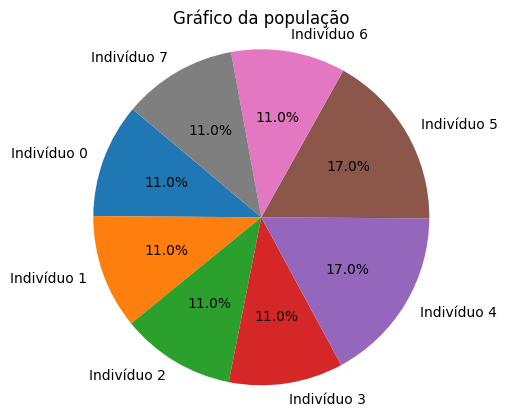


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [1 2 0 3]

Pai 1 -> Individuo  4 : [0 2 3 1]

Pai 2 -> Individuo  5 : [3 2 0 1]

Pai 3 -> Individuo  7 : [2 1 3 0]


Filho 0 -> [1 0 2 3]

Filho 1 -> [0 1 2 3]

Filho 2 -> [3 2 1 0]

Filho 3 -> [2 3 1 0]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0]


Individuo [0 2 3 1] de fitness 18.0  SALVO

Individuo [3 2 0 1] de fitness 18.0 esmagado

Individuo [1 0 3 2] de fitness 27.0 esmagado

Individuo [3 2 1 0] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



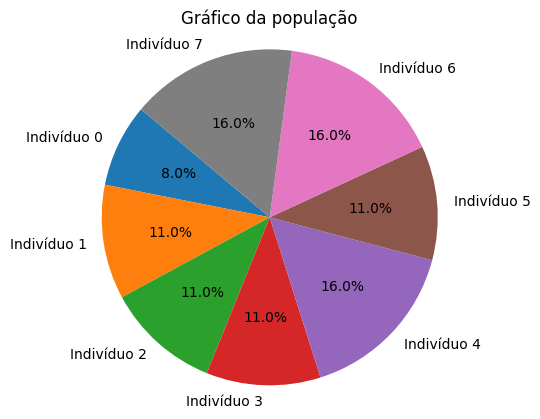


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [1 0 2 3]

Pai 1 -> Individuo  5 : [0 1 2 3]

Pai 2 -> Individuo  7 : [0 2 3 1]

Pai 3 -> Individuo  1 : [3 2 1 0]


Filho 0 -> [1 0 2 3]

Filho 1 -> [0 1 2 3]

Filho 2 -> [0 3 2 1]

Filho 3 -> [3 0 2 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 18.0, 18.0, 18.0, 27.0, 27.0, 27.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [0 3 2 1] de fitness 27.0 esmagado

Individuo [0 3 1 2] de fitness 27.0 esmagado

Individuo [1 0 2 3] de fitness 18.0 esmagado

Individuo [0 2 3 1] de fitness 18.0 esmagado


Últimos Resultados: [18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



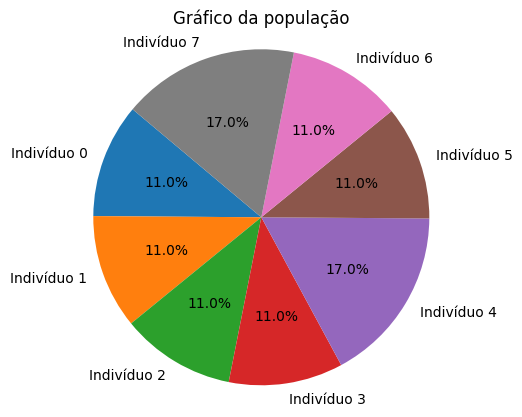


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 3 1 0]

Pai 1 -> Individuo  5 : [0 1 2 3]

Pai 2 -> Individuo  7 : [1 0 2 3]

Pai 3 -> Individuo  1 : [1 3 0 2]


Não houve reprodução


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0]


Não houve meteoro :c


Últimos Resultados: [18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



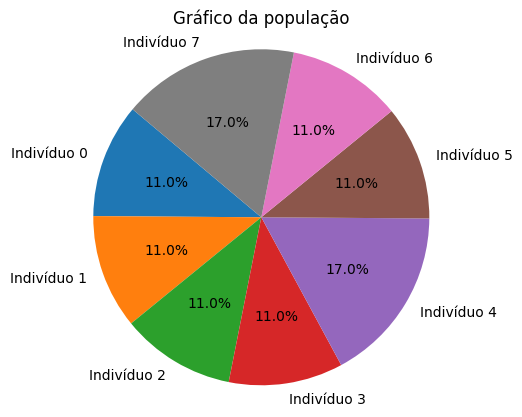


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [1 3 0 2]

Pai 1 -> Individuo  3 : [0 1 2 3]

Pai 2 -> Individuo  5 : [0 1 2 3]

Pai 3 -> Individuo  7 : [1 0 2 3]


Não houve reprodução


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0]


Não houve meteoro :c


Últimos Resultados: [18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



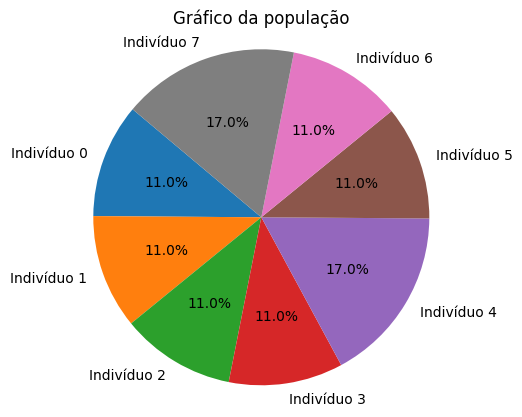


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 3 1 0]

Pai 1 -> Individuo  5 : [0 1 2 3]

Pai 2 -> Individuo  7 : [1 0 2 3]

Pai 3 -> Individuo  1 : [1 3 0 2]


Filho 0 -> [2 0 1 3]

Filho 1 -> [0 2 1 3]

Filho 2 -> [1 3 0 2]

Filho 3 -> [3 1 0 2]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 18.0]


Individuo [2 3 1 0] de fitness 18.0  SALVO

Individuo [3 0 2 1] de fitness 27.0 esmagado

Individuo [3 2 1 0] de fitness 27.0 esmagado

Individuo [0 1 2 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



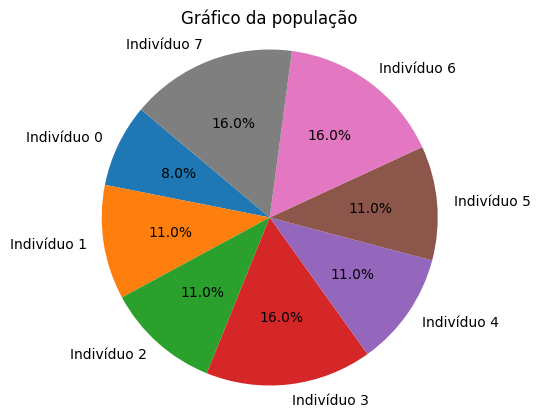


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [2 1 3 0]

Pai 1 -> Individuo  3 : [1 0 2 3]

Pai 2 -> Individuo  5 : [1 3 0 2]

Pai 3 -> Individuo  7 : [2 3 1 0]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [1 2 3 0]

Filho 3 -> [2 1 3 0]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [1 3 0 2] de fitness 27.0 esmagado

Individuo [2 1 3 0] de fitness 27.0 esmagado

Individuo [2 3 1 0] de fitness 18.0 esmagado

Individuo [1 3 0 2] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



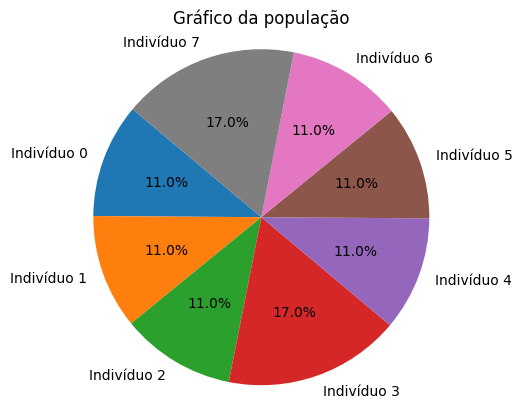


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 1 0 3]

Pai 1 -> Individuo  6 : [1 2 3 0]

Pai 2 -> Individuo  0 : [2 1 3 0]

Pai 3 -> Individuo  2 : [0 2 1 3]


Filho 0 -> [2 1 3 0]

Filho 1 -> [1 2 3 0]

Filho 2 -> [2 0 1 3]

Filho 3 -> [0 2 1 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 27.0]


Individuo [3 1 0 2] de fitness 18.0  SALVO

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [1 2 3 0] de fitness 27.0 esmagado

Individuo [2 1 3 0] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



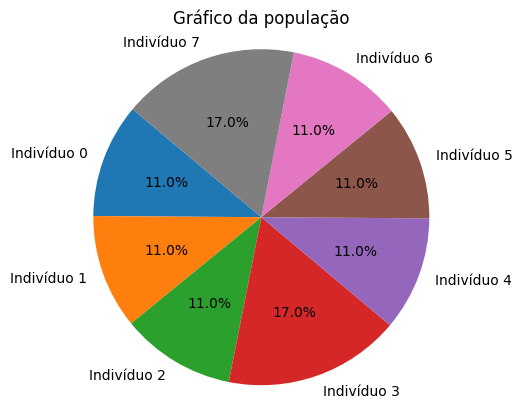


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  3 : [1 0 2 3]

Pai 1 -> Individuo  5 : [1 2 3 0]

Pai 2 -> Individuo  7 : [3 1 0 2]

Pai 3 -> Individuo  1 : [0 2 1 3]


Não houve reprodução


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 18.0]


Não houve meteoro :c


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



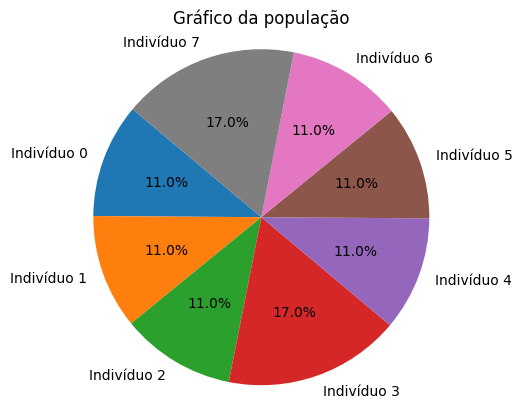


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  4 : [2 1 3 0]

Pai 1 -> Individuo  6 : [0 2 1 3]

Pai 2 -> Individuo  0 : [0 1 2 3]

Pai 3 -> Individuo  2 : [2 1 0 3]


Filho 0 -> [2 0 1 3]

Filho 1 -> [0 2 1 3]

Filho 2 -> [0 2 1 3]

Filho 3 -> [2 0 1 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 18.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [0 1 2 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [1 2 3 0] de fitness 27.0 esmagado

Individuo [0 2 1 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



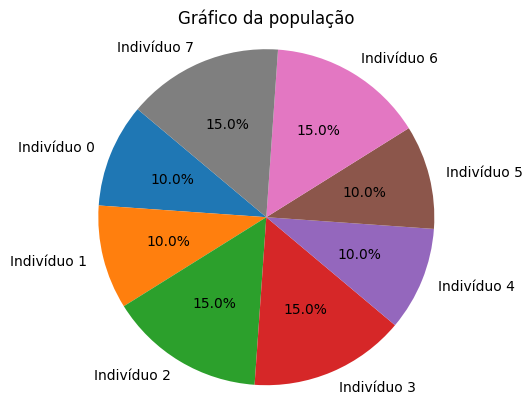


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  1 : [0 2 1 3]

Pai 1 -> Individuo  3 : [2 0 1 3]

Pai 2 -> Individuo  5 : [0 2 1 3]

Pai 3 -> Individuo  7 : [1 0 2 3]


Filho 0 -> [0 2 1 3]

Filho 1 -> [2 0 1 3]

Filho 2 -> [0 1 2 3]

Filho 3 -> [1 0 2 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 18.0, 18.0, 27.0, 18.0, 27.0, 18.0]


Individuo [3 1 0 2] de fitness 18.0  SALVO

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado

Individuo [1 0 2 3] de fitness 18.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



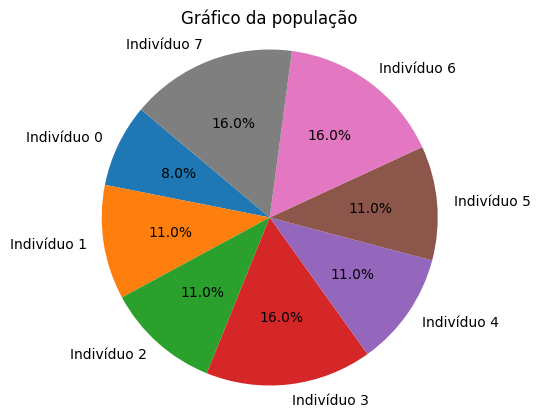


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  3 : [2 0 1 3]

Pai 1 -> Individuo  5 : [0 1 2 3]

Pai 2 -> Individuo  7 : [3 1 0 2]

Pai 3 -> Individuo  1 : [0 2 1 3]


Filho 0 -> [2 0 1 3]

Filho 1 -> [0 2 1 3]

Filho 2 -> [3 0 2 1]

Filho 3 -> [0 3 2 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 18.0, 18.0, 27.0, 27.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]



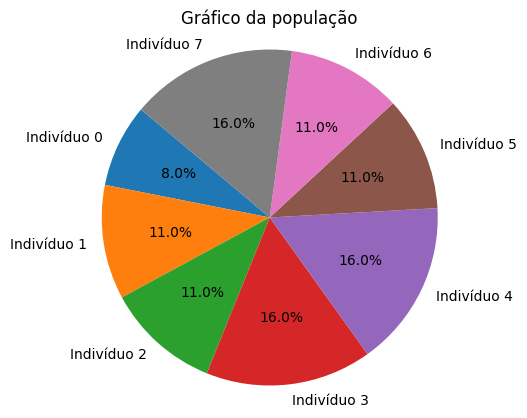


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  7 : [2 0 1 3]

Pai 1 -> Individuo  2 : [0 1 2 3]

Pai 2 -> Individuo  4 : [3 1 0 2]

Pai 3 -> Individuo  5 : [3 0 2 1]


Filho 0 -> [2 0 1 3]

Filho 1 -> [0 2 1 3]

Filho 2 -> [3 0 2 1]

Filho 3 -> [0 3 2 1]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 18.0, 18.0, 27.0, 27.0, 27.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [0 1 2 3] de fitness 27.0 esmagado

Individuo [3 0 2 1] de fitness 27.0 esmagado

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [0 3 2 1] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.  0.
  0.  0.]



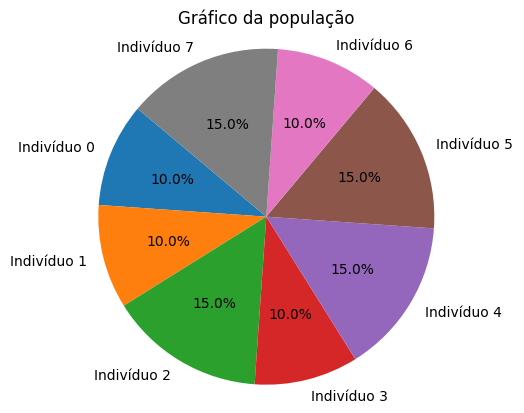


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  5 : [2 0 1 3]

Pai 1 -> Individuo  7 : [1 0 2 3]

Pai 2 -> Individuo  1 : [0 2 1 3]

Pai 3 -> Individuo  3 : [0 3 2 1]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [0 3 2 1]

Filho 3 -> [3 0 2 1]


Individuo 2 mutado ANTES ->  [3 1 0 2]

Individuo 2 mutado DEPOIS ->  [2 1 0 3]


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 18.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [0 2 1 3] de fitness 27.0 esmagado

Individuo [0 3 2 1] de fitness 27.0 esmagado

Individuo [1 0 2 3] de fitness 18.0 esmagado

Individuo [0 3 2 1] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.  0.
  0.  0.]



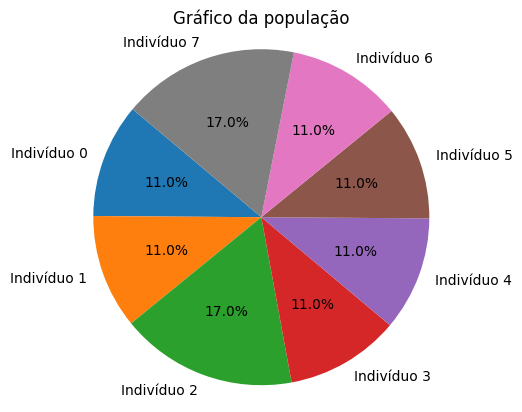


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  2 : [2 0 1 3]

Pai 1 -> Individuo  5 : [1 2 0 3]

Pai 2 -> Individuo  7 : [2 0 1 3]

Pai 3 -> Individuo  1 : [2 1 0 3]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [2 1 0 3]

Filho 3 -> [1 2 0 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [3 0 2 1] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [3 0 2 1] de fitness 27.0 esmagado

Individuo [2 1 3 0] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.  0.
  0.  0.]



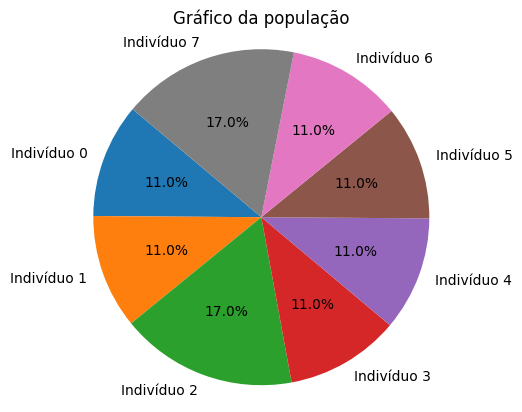


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  7 : [2 0 1 3]

Pai 1 -> Individuo  1 : [1 2 0 3]

Pai 2 -> Individuo  2 : [2 0 1 3]

Pai 3 -> Individuo  5 : [2 1 0 3]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [2 1 0 3]

Filho 3 -> [1 2 0 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.  0.
  0.  0.]



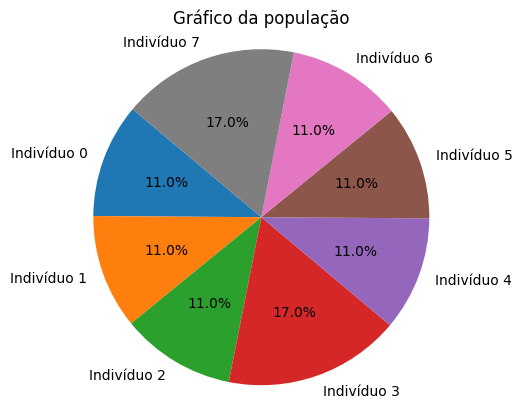


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [1 2 0 3]

Pai 1 -> Individuo  0 : [2 1 0 3]

Pai 2 -> Individuo  2 : [1 2 0 3]

Pai 3 -> Individuo  4 : [2 1 0 3]


Filho 0 -> [1 2 0 3]

Filho 1 -> [2 1 0 3]

Filho 2 -> [1 2 0 3]

Filho 3 -> [2 1 0 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.  0.
  0.  0.]



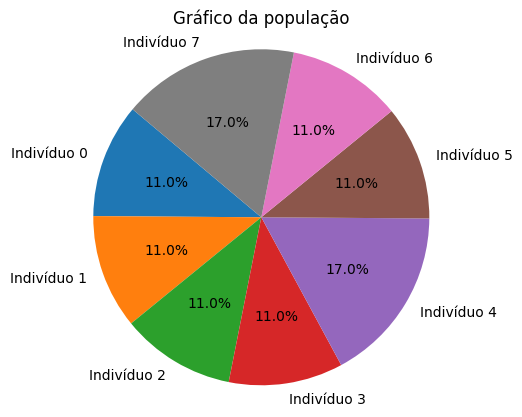


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [1 2 0 3]

Pai 1 -> Individuo  7 : [2 0 1 3]

Pai 2 -> Individuo  2 : [2 1 0 3]

Pai 3 -> Individuo  4 : [2 0 1 3]


Filho 0 -> [1 2 0 3]

Filho 1 -> [2 1 0 3]

Filho 2 -> [2 0 1 3]

Filho 3 -> [0 2 1 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.  0.
  0.  0.]



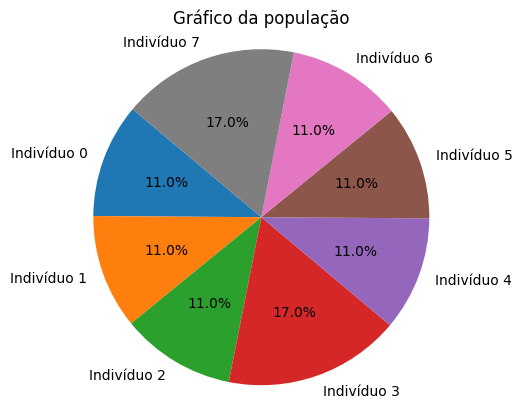


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [2 1 0 3]

Pai 1 -> Individuo  2 : [1 2 0 3]

Pai 2 -> Individuo  4 : [1 2 0 3]

Pai 3 -> Individuo  6 : [0 2 1 3]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [1 0 2 3]

Filho 3 -> [0 1 2 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 18.0, 27.0]


Individuo [2 0 1 3] de fitness 18.0  SALVO

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
  0.  0.]



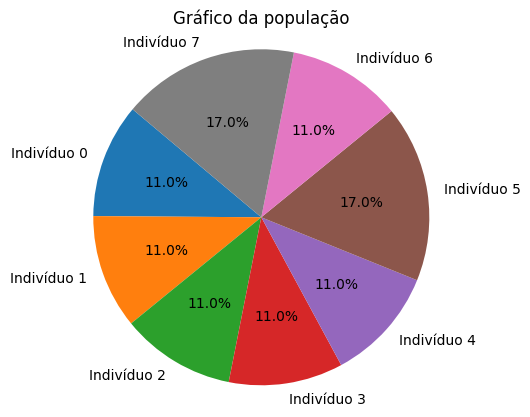


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  0 : [2 1 0 3]

Pai 1 -> Individuo  3 : [2 1 0 3]

Pai 2 -> Individuo  5 : [1 0 2 3]

Pai 3 -> Individuo  7 : [2 0 1 3]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [1 2 0 3]

Filho 3 -> [2 1 0 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [2 0 1 3] de fitness 18.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [0 2 1 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18.  0.]



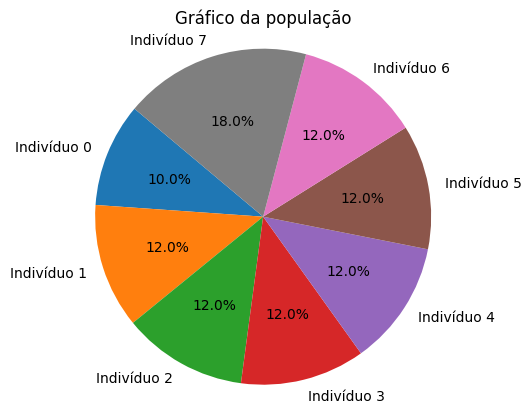


PAIS ESCOLHIDOS:

Pai 0 -> Individuo  6 : [2 1 0 3]

Pai 1 -> Individuo  0 : [2 1 0 3]

Pai 2 -> Individuo  2 : [2 1 0 3]

Pai 3 -> Individuo  4 : [2 1 0 3]


Filho 0 -> [2 1 0 3]

Filho 1 -> [1 2 0 3]

Filho 2 -> [2 1 0 3]

Filho 3 -> [1 2 0 3]


Não houve mutação


FITNESS DA POPULAÇÃO:
[27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 18.0, 27.0, 27.0, 27.0, 27.0]


Individuo [1 0 2 3] de fitness 18.0  SALVO

Individuo [2 1 0 3] de fitness 27.0 esmagado

Individuo [1 2 0 3] de fitness 27.0 esmagado

Individuo [0 1 2 3] de fitness 27.0 esmagado

Individuo [2 1 0 3] de fitness 27.0 esmagado


Últimos Resultados: [18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18. 18.]



Melhor Rota: [1 0 2 3]

Menor Custo: 18.0


In [ ]:
from IPython.display import display, HTML


tamanho_populacao = 8
pause = False#True
log = True


with open(nome_arquivo, 'r') as file:
    for linha in file:

      texto = "\n=======================================================================================\nNOVAS CIDADES\n======================================================================================="
      html_content = f"<span style='color: red;'>{texto}</span><br>"
      display(HTML(html_content))

      resultados = np.zeros(20)
      melhor_rota = []
      menor_custo = 0
      posicao = 0
      geracao = 0
      quantidade_cidades, distancia_cidades = retorna_cidades(linha)
      populacao = criar_populacao(quantidade_cidades,tamanho_populacao)
      populacao_fitness = calcular_fitness(populacao,distancia_cidades,quantidade_cidades)

      while sum(resultados) == 0 or len(set(resultados)) != 1:

        if log:
          texto = "\n======================================================================================= GERACAO " + str(geracao) + " ======================================================================================="
          geracao+=1
          html_content = f"<span style='color: red;'>{texto}</span><br>"
          display(HTML(html_content))

        pais = escolha_pais(populacao,populacao_fitness)

        populacao = reproducao(populacao,pais,quantidade_cidades)

        populacao = mutacao(populacao)

        populacao_fitness = calcular_fitness(populacao,distancia_cidades,quantidade_cidades)

        populacao,populacao_fitness = meteoro(populacao,populacao_fitness,tamanho_populacao)

        resultados[posicao] = min(populacao_fitness)

        melhor_rota = populacao[populacao_fitness.index(min(populacao_fitness))]
        menor_custo = min(populacao_fitness)

        if posicao+1 == len(resultados):
          posicao = 0
        else:
          posicao+=1
        if log:
          print("\nÚltimos Resultados:",resultados)
          print("\n=======================================================================================")

        if pause:
          input("Pressione Enter para continuar...")


      print("\n=======================================================================================")
      print("\nMelhor Rota:",melhor_rota)
      print("\nMenor Custo:",menor_custo)